# GRIP: The Sparks Foundation 
Data Science and Business Analytics Internship         TASK 1: Prediction Using Supervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [3]:
df.shape

(25, 2)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [12]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Our data did not contain any null value.
Hence the data is clear so, we can proceed to our next step pf visualizing

STEP 2: DATA VISUALIZING

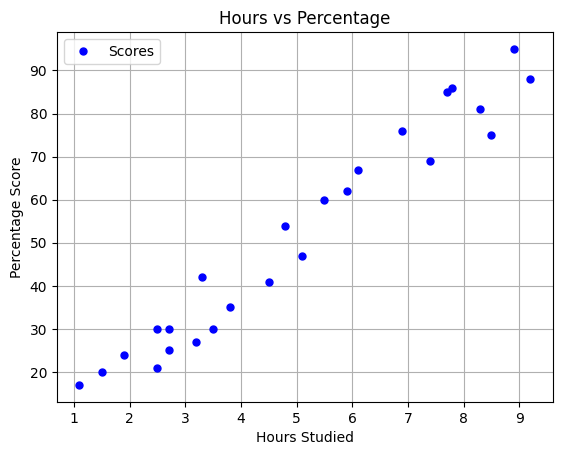

In [15]:
# Plotting the dataset
df.plot(x='Hours',y='Scores', color='Blue', style='.',markersize=10)
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

In [19]:
# We can use .corr function to determine the relationship between the variable
df.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


STEP 3: DATA PREPARATION 

In [17]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
# we will use  iloc function to divide the data
X = df.iloc[:, :1].values
Y = df.iloc[:, 1:].values


In [25]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [26]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=50)

STEP 4: training the Algorithm 


In [28]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

STEP 5: VISUALIZING THE MODEL

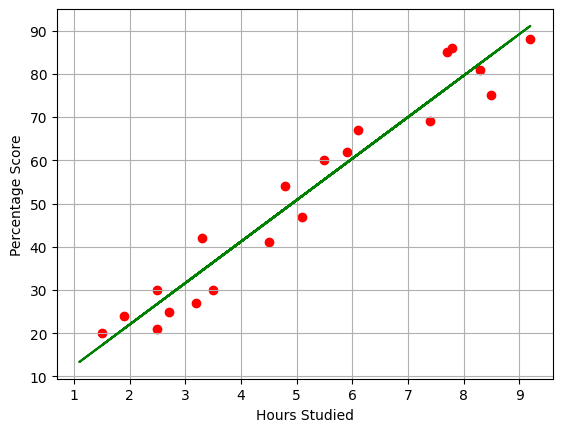

In [29]:
#plotting for the training data
m=model.coef_
c=model.intercept_
line=m*X+c
plt.scatter(X_train, Y_train , color = "red")
plt.plot(X, line, color="green")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

STEP 6: Making Prediction

In [31]:
print(X_test)
Y_pred = model.predict(X_test)


[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [32]:
Y_test

array([[95],
       [30],
       [76],
       [35],
       [17]], dtype=int64)

In [33]:
Y_pred

array([[88.21139357],
       [28.71845267],
       [69.02012231],
       [39.27365186],
       [13.36543566]])

In [34]:
comp = pd.DataFrame({'Actual':[Y_test],'predicted':[Y_pred]})
comp

,Actual,predicted
0,"[[95], [30], [76], [35], [17]]","[[88.21139357388518], [28.71845266505782], [69..."


In [35]:
# testing with your data
Hour = 9.25
own_pred = model.predict([[Hour]])
print("The predicted score if a person studied",Hour,"Hour is",own_pred[0])

The predicted score if a person studied 9.25 Hour is [91.56986604]


STEP 7: EVALUATING THE MODEL 

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error: 4.5916495300630285
